# Statistiques sur la structure des graphes

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import random

## 1. Introduction

Dans ce notebook, on va s'intéresser à des statistiques "générales" sur les graphes de Git. Notamment, on va regarder des statistiques sur les enfants d'un noeud, sur les parents d'un noeud et sur la proportion de noeuds dans le main.

Pour notre analyse, on va se baser sur deux CSV **stats_enfants.csv** et **stats_parents.csv** qui contiennent les colonnes :
- Type, le type du graphe parmi small, medium, large. On rappelle que small = 100-10000 noeuds, medium = 10000-100000 noeuds et large = 100000-1000000 noeuds
- File name : le nom du fichier.
- Nodes count : le nombre de noeuds du graphe.
- Leaves count et % leaves : le nombre de feuilles du graphe et sa proportion dans le graphe. 
- 1 child, n childrens (ou parents), % 1 child et % n childrens (ou parents): le nombre de noeuds à $n$ enfants (ou parents) et leur proportion dans le graphe.
- P(X=n)/P(X=n-1) : la ratio entre le nombre de noeuds à n enfants et le nombre de noeuds à n-1 enfants. On ne va pas se servir de ces colonnes dans ce notebook mais dans **Loi_geom.ipynb**.
- More than 30 et % More than 30 : le nombre de noeuds à plus de 30 enfants car certains graphes on des noeuds à plus de 30 enfants mais cela reste des cas isolés.

## 2. Statistiques sur les enfants

In [5]:
df_enf = pd.read_csv('CSV/GitDAG/stats_enfants.csv').dropna(axis=1)
df_enf

,Type,File name,Nodes count,Leaves count,% leaves,1 child,2 childrens,3 childrens,4 childrens,5 childrens,...,% 22 childrens,% 23 childrens,% 24 childrens,% 25 childrens,% 26 childrens,% 27 childrens,% 28 childrens,% 29 childrens,% 30 childrens,% More than 30
0,small,git.age.tdag,3673,1269,34.5494,1554,558,172,57,30,...,0.0272,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,small,git.answer.tdag,7241,379,5.2341,5305,1242,205,50,23,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,small,git.flink-cdc.tdag,6615,1825,27.5888,3944,387,180,102,64,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0151
3,small,git.fury.tdag,5834,1285,22.0261,3499,719,217,72,29,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,small,git.guacamole-server.tdag,4648,115,2.4742,3962,297,159,72,25,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,large,git.spark.tdag,332366,50481,15.1884,249070,14566,6211,3875,2473,...,0.0060,0.0027,0.0024,0.0021,0.0009,0.0009,0.0015,0.0012,0.0009,0.0159
107,large,git.swift.tdag,265418,14595,5.4989,207053,18504,11017,6164,3431,...,0.0008,0.0011,0.0004,0.0011,0.0000,0.0004,0.0008,0.0004,0.0004,0.0049
108,large,git.symfony.tdag,131646,14398,10.9369,87601,15953,6496,3115,1633,...,0.0023,0.0030,0.0023,0.0015,0.0015,0.0008,0.0008,0.0008,0.0015,0.0182
109,large,git.tensorflow.tdag,261788,20570,7.8575,215109,17385,4653,1635,764,...,0.0008,0.0023,0.0004,0.0004,0.0008,0.0011,0.0015,0.0015,0.0011,0.0103


On va d'abord regarder comment se répartissent les noeuds à n enfants (on considère ici que les feuilles en ont 0).

In [37]:
def create_index(df):
    index = dict()
    for idx, row in df.iterrows():
        index[row["File name"]] = idx
    return index

index = create_index(df_enf)

In [23]:
def random_graphs(k, df):
    names = dict()
    for type_g in ["small", "medium", "large"]:
        names[type_g] = (random.sample(list(df[df["Type"] == type_g]["File name"]), k=k))
    return names

def draw_histo_c(graph_name, type_g, df, num):
    line = df[df['File name'] == graph_name].iloc[0]
    col_range = ["1 child"]
    col_range.extend([f"{i} childrens" for i in range(2, 31)])
    col_range.append("More than 30")
    available_cols = [col for col in col_range if col in df.columns]
    val = line[available_cols]
    plt.figure(figsize=(10, 5))
    val.plot(kind='bar')
    plt.title(f'[{num}] Childrens distribution for {graph_name} {type_g}')
    plt.xlabel('Number of childrens')
    plt.ylabel('Nodes')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

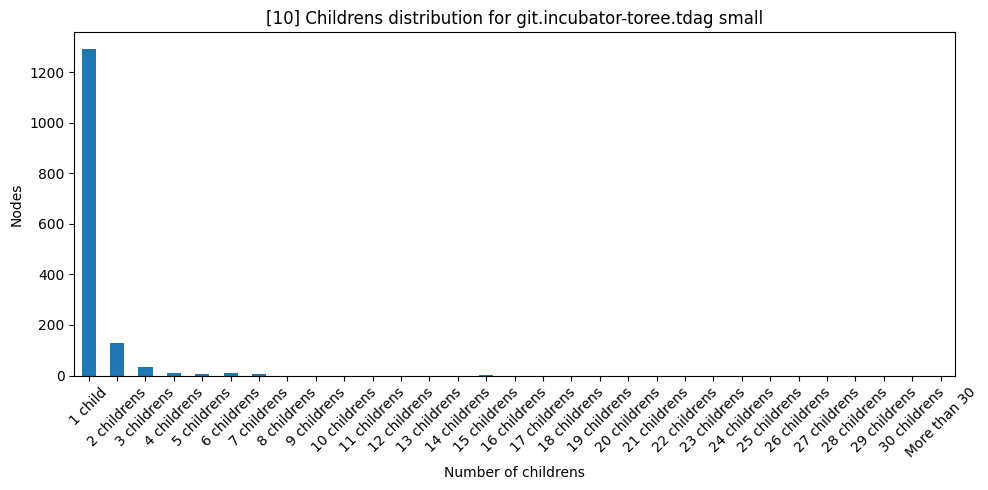

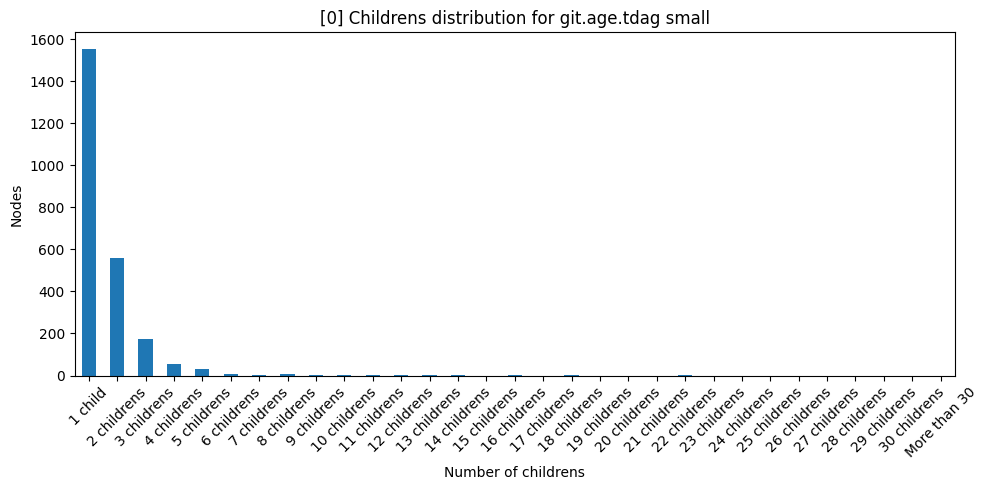

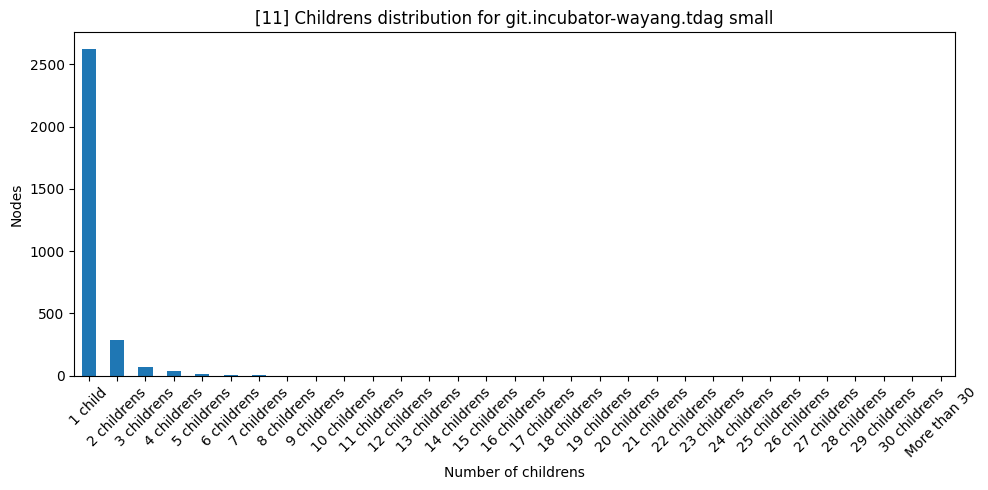

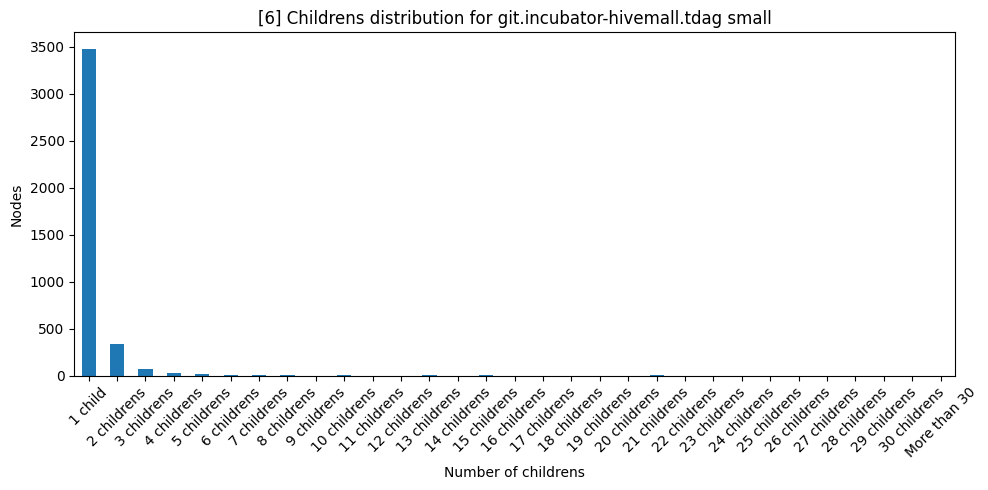

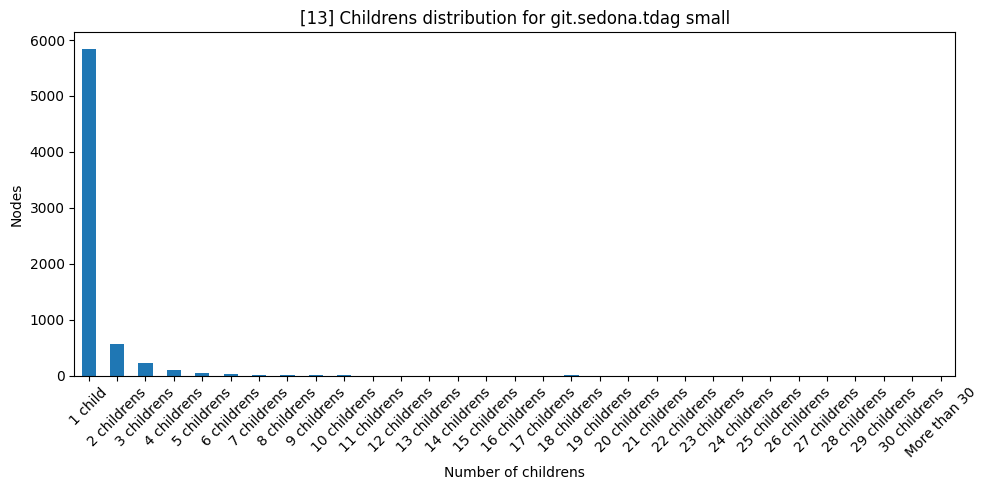

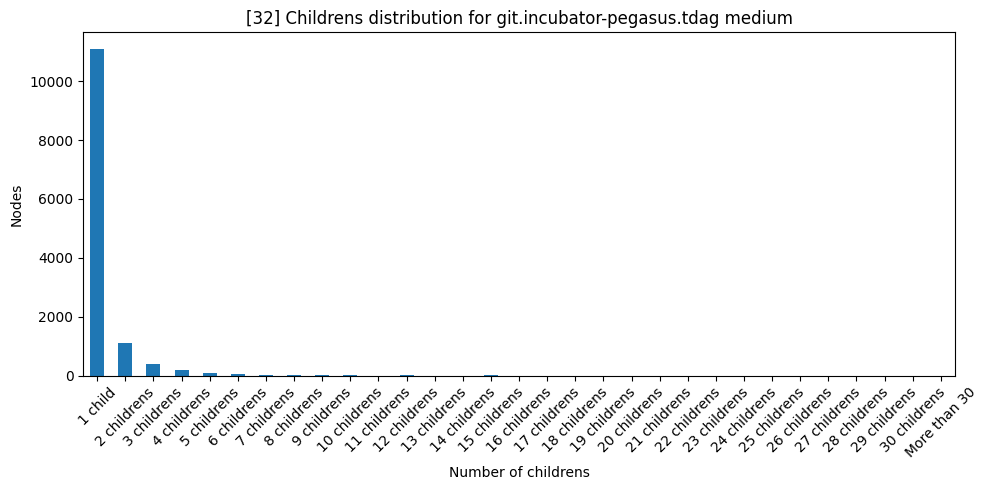

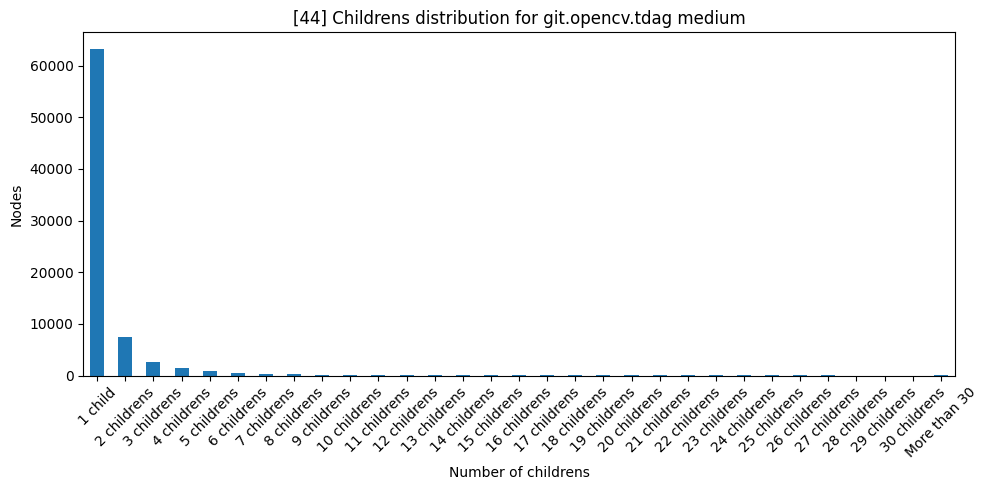

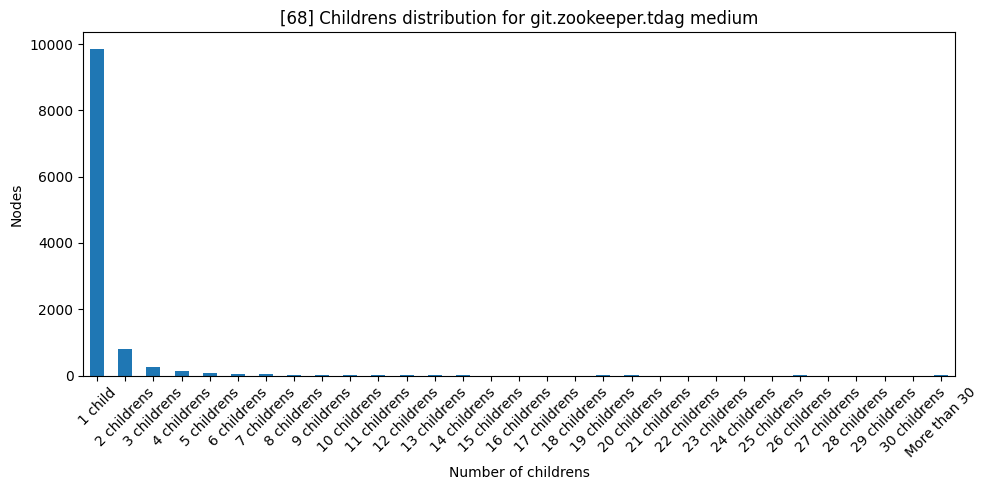

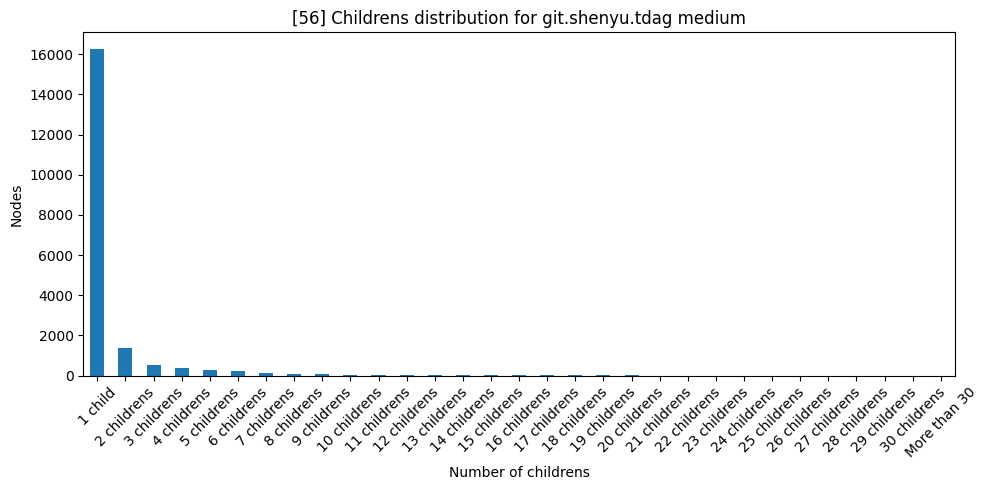

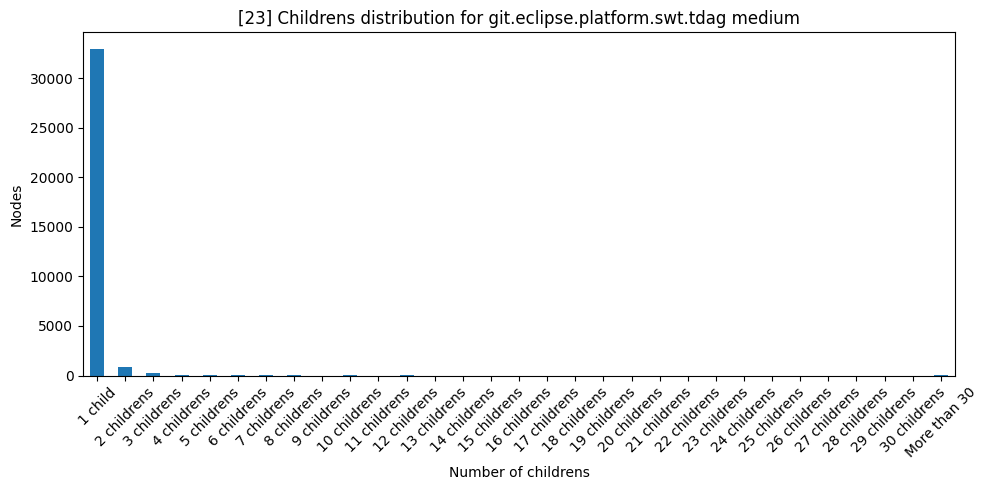

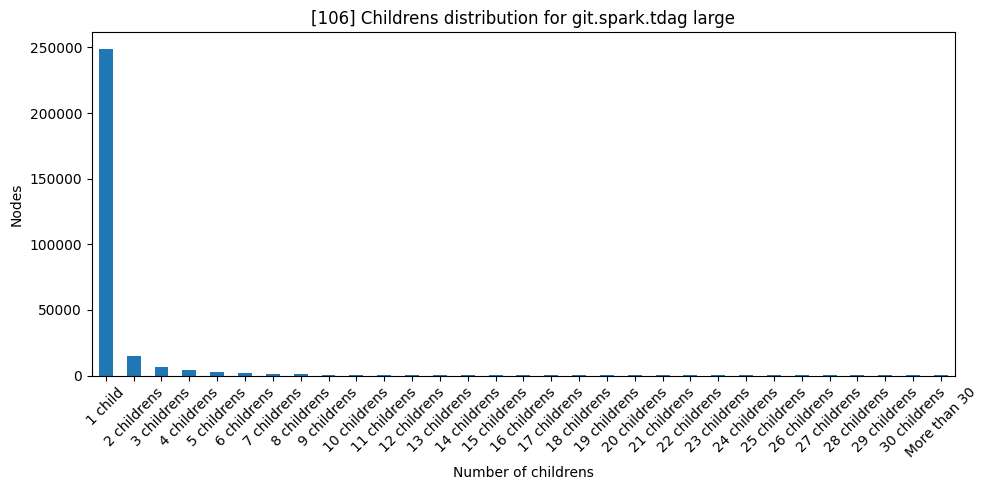

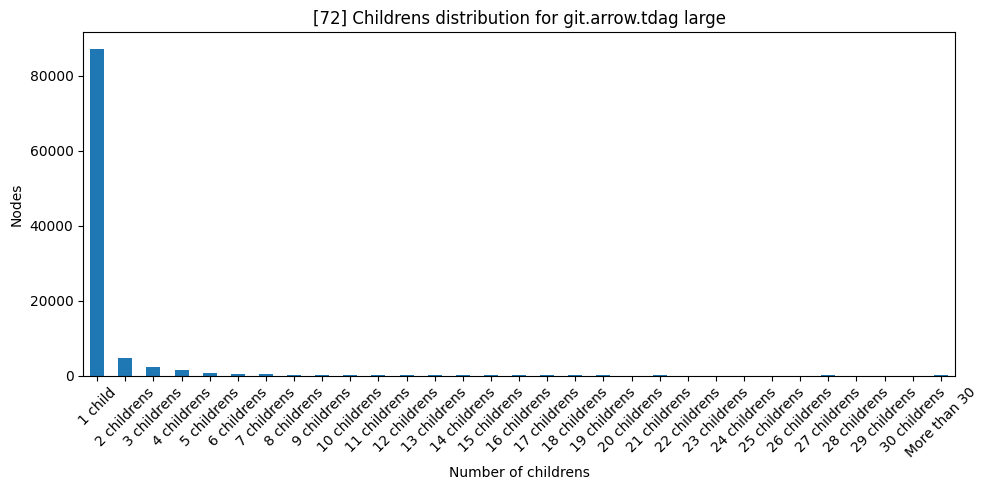

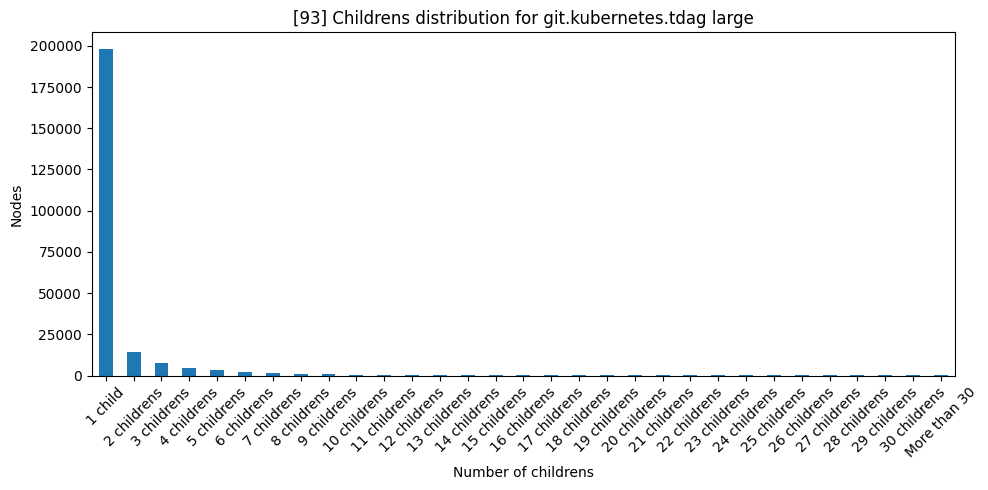

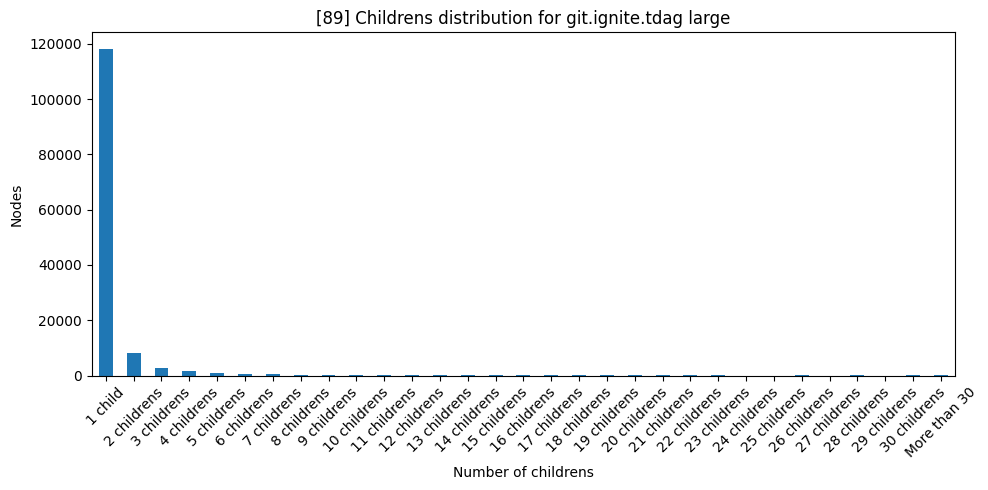

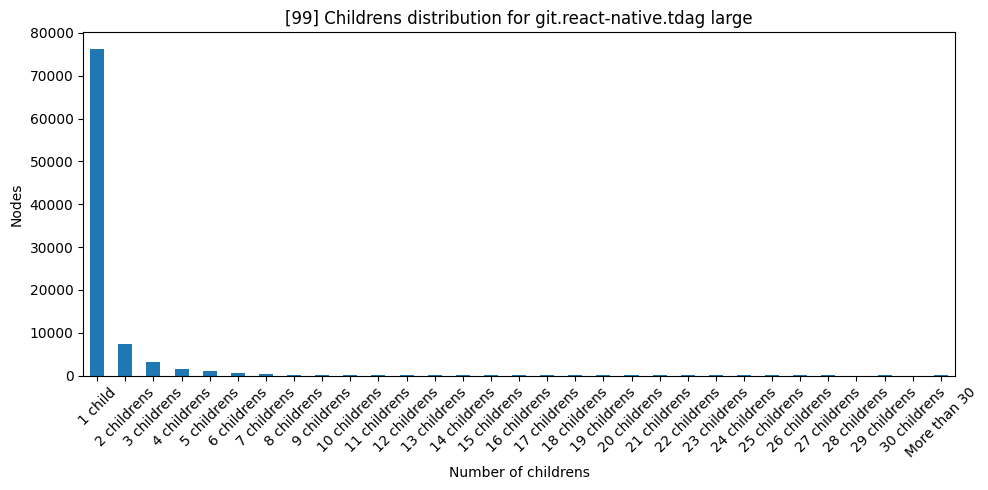

In [38]:
for type_g, graph_list in random_graphs(5, df_enf).items():
    for name in graph_list:
        draw_histo_c(name, type_g, df_enf, index[name])

En prennant 5 graphes de chaque type aléatoirement, on remarque que la plupart des noeuds ont en majorité 1 enfant et sinon de 2 à 6. Le reste est très minime.

Nous allons maintenant faire la moyenne des proportions.

In [32]:
def generate_prop_c(df_c):
    cols_c = ["% leaves", "% 1 child"]
    cols_c.extend([f"% {i} childrens" for i in range(2, 30)])
    cols_c.append("% More than 30")

    prob_c = [df_c[col].mean() for col in cols_c]
                 
    caract = [name.removeprefix("% ") for name in cols_c]
    caract[0] = "leaf"
    probabilities = prob_c
    proportion = [p/100 for p in prob_c]

    df = pd.DataFrame({
        "Caract": caract,
        "Probability (%)": probabilities,
        "Proportion" : proportion
    })

    return df

generate_prop_c(df_enf)

,Caract,Probability (%),Proportion
0,leaf,12.757305,0.127573
1,1 child,75.219585,0.752196
2,2 childrens,6.893395,0.068934
3,3 childrens,2.308890,0.023089
4,4 childrens,1.127482,0.011275
5,5 childrens,0.625511,0.006255
6,6 childrens,0.368789,0.003688
7,7 childrens,0.216154,0.002162
8,8 childrens,0.139359,0.001394
9,9 childrens,0.090524,0.000905


En faisant la moyenne, on se rend bien compte de ce qu'on avait observé sur quelques graphes. Les noeuds ont la plupart du temps (75%) une seul enfant, puis on a les feuilles à 12%, les noeuds à 2 enfants (6,9%), les noeuds à 3 enfants (2,3%) et les noeuds à 4 enfants (1,1%). Le reste est en dessous de 1%.

## 3. Statistiques sur les parents

On s'intéresse maintenant aux parents des noeuds. Contrairement aux enfants, on n'a aucun noeud à plus de 3 parents dans nos graphes et même les noeuds à 3 parents sont très rares. On s'en rend compte lors de l'extraction des statistiques.

In [33]:
df_p = pd.read_csv('CSV/GitDAG/stats_parents.csv').dropna(axis=1)
df_p

,Type,File name,Nodes count,1 parent,2 parents,3 parents,More than 3,% 1 parent,% 2 parents,% 3 parents,% More than 3
0,small,git.age.tdag,3673,3471,199,0,0,94.5004,5.4179,0.0000,0.0000
1,small,git.answer.tdag,7241,5475,1765,0,0,75.6111,24.3751,0.0000,0.0000
2,small,git.flink-cdc.tdag,6615,6315,299,0,0,95.4649,4.5200,0.0000,0.0000
3,small,git.fury.tdag,5834,5558,275,0,0,95.2691,4.7137,0.0000,0.0000
4,small,git.guacamole-server.tdag,4648,3706,936,0,0,79.7332,20.1377,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...
106,large,git.spark.tdag,332366,288231,44127,1,0,86.7210,13.2766,0.0003,0.0000
107,large,git.swift.tdag,265418,176383,89032,0,1,66.4548,33.5441,0.0000,0.0004
108,large,git.symfony.tdag,131646,81920,49721,0,0,62.2275,37.7687,0.0000,0.0000
109,large,git.tensorflow.tdag,261788,232739,29044,0,0,88.9036,11.0945,0.0000,0.0000


On va commencer par regarder comment se distribuent les noeuds à 1, 2 et 3 parents sur quelques graphes.

In [44]:
def draw_histo_p(graph_name, type_g, df, num):
    line = df[df['File name'] == graph_name].iloc[0]
    col_range = ["1 parent", "2 parents", "3 parents"]
    available_cols = [col for col in col_range if col in df.columns]
    val = line[available_cols]
    plt.figure(figsize=(10, 5))
    val.plot(kind='bar')
    plt.title(f'[{num}] Parents distribution for {graph_name} {type_g}')
    plt.xlabel('Number of parents')
    plt.ylabel('Nodes')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

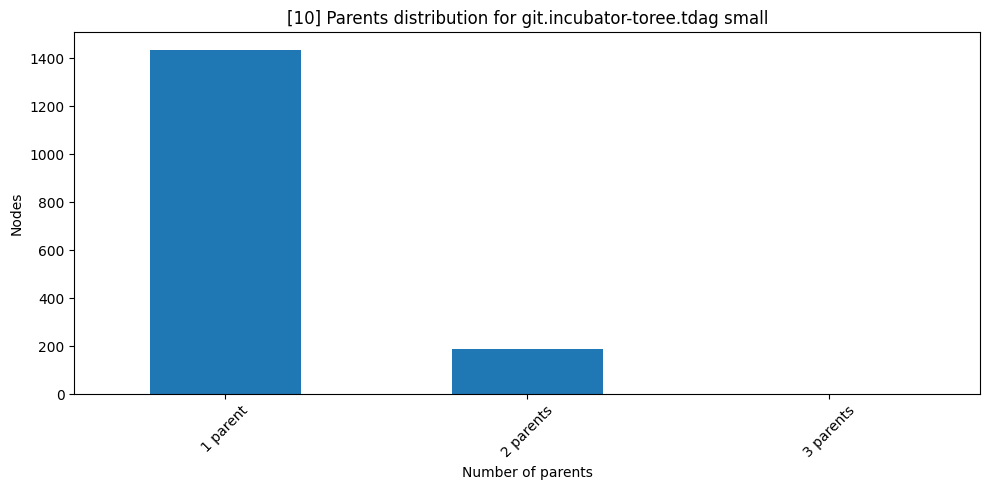

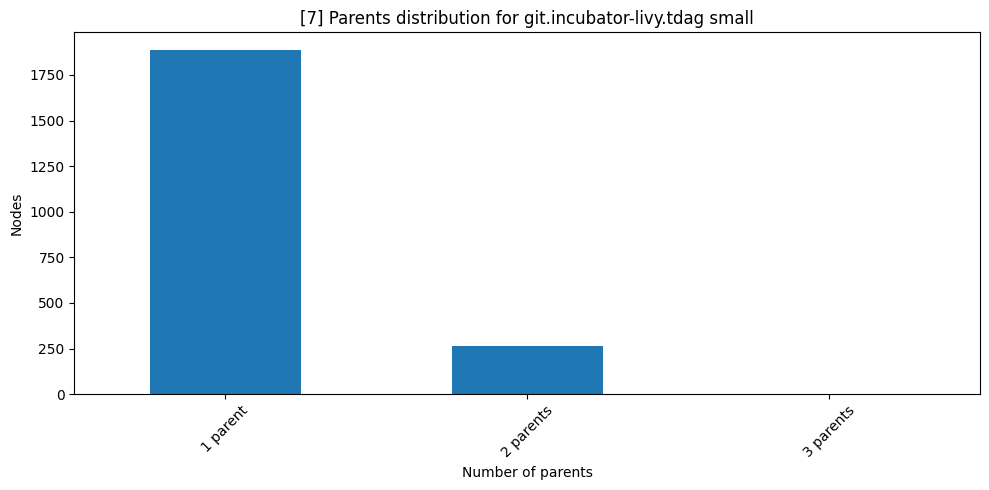

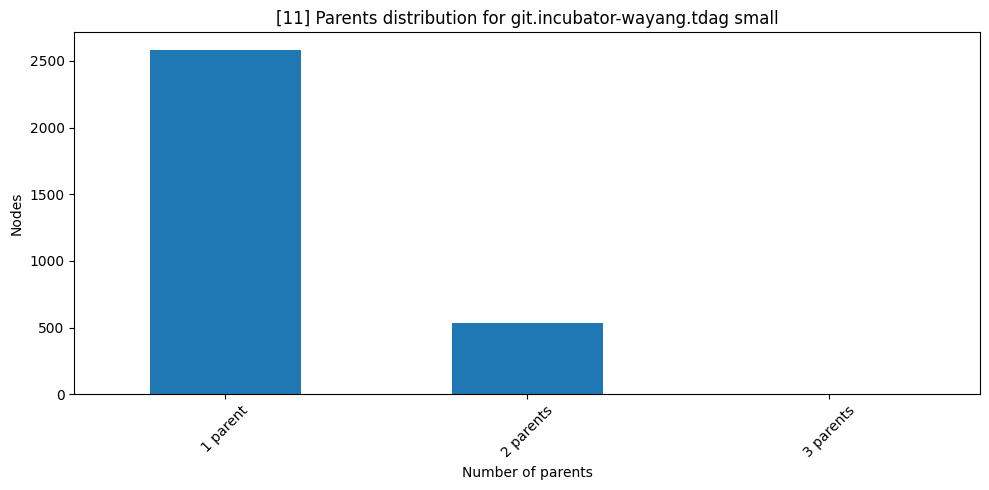

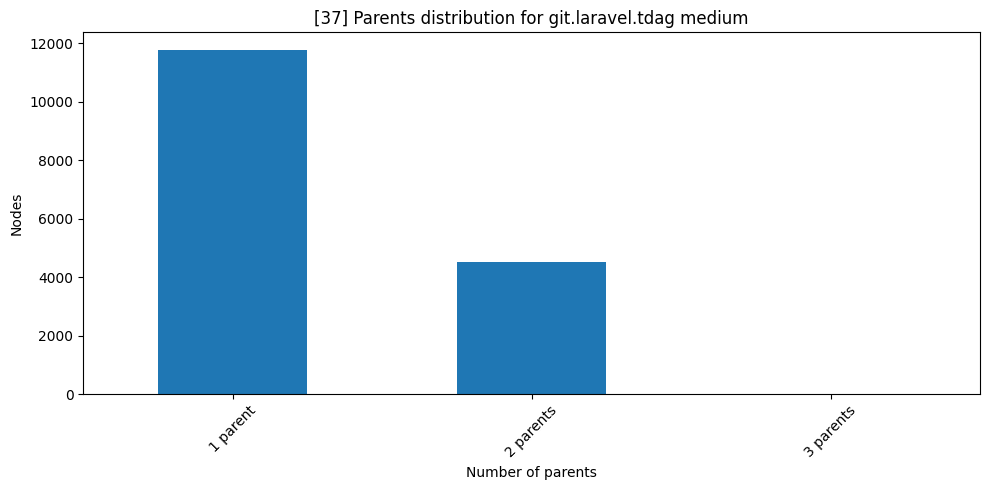

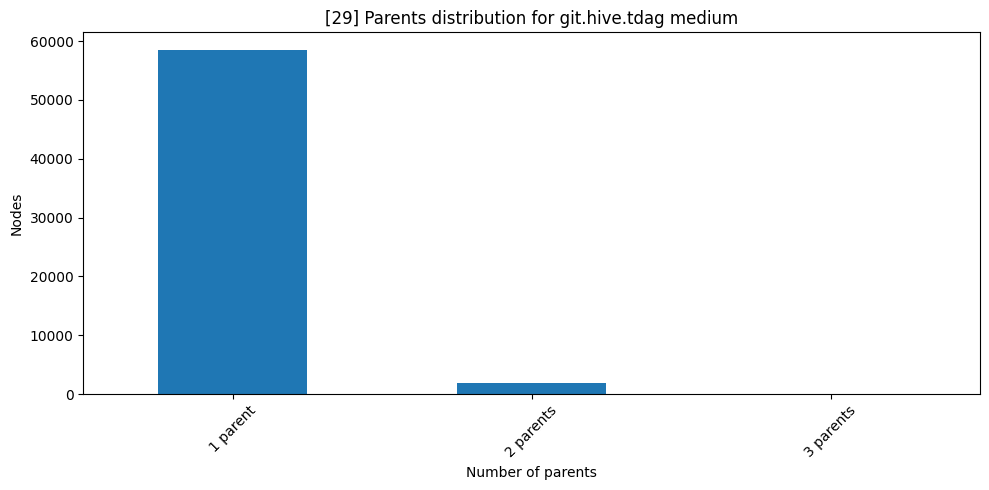

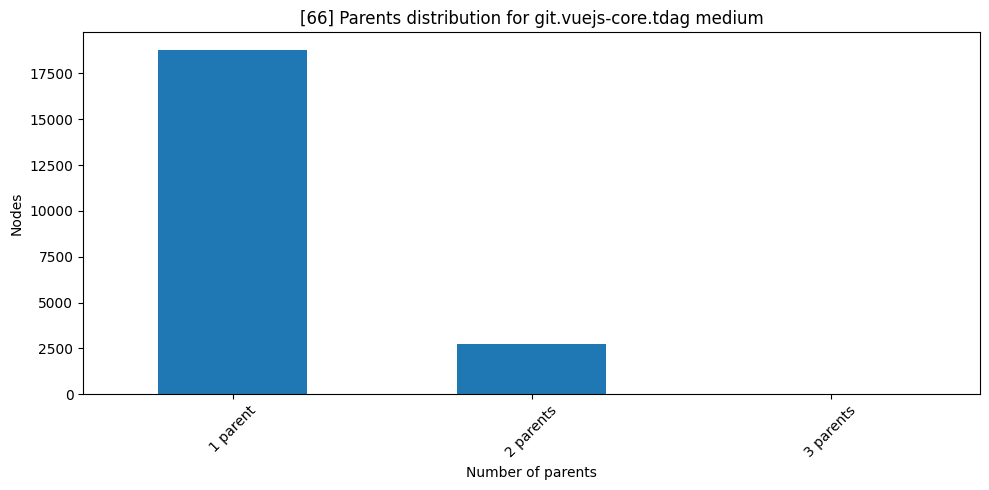

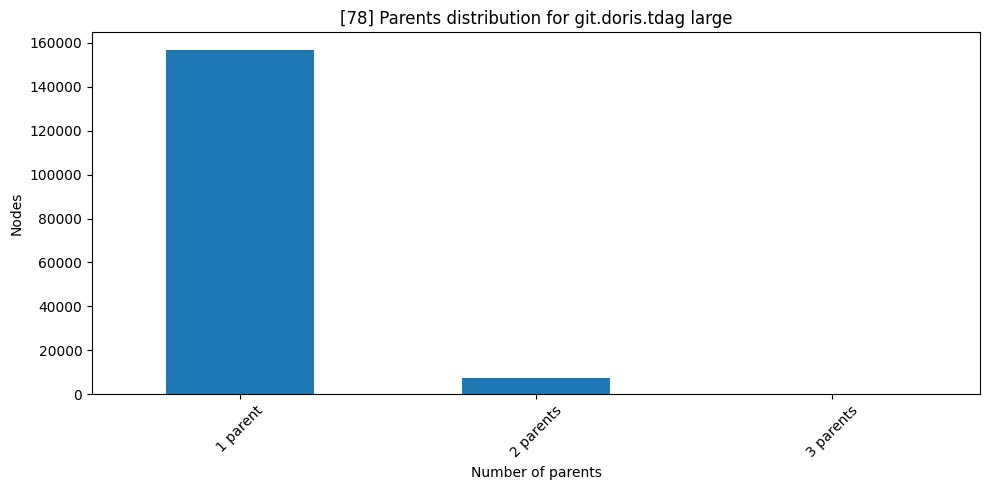

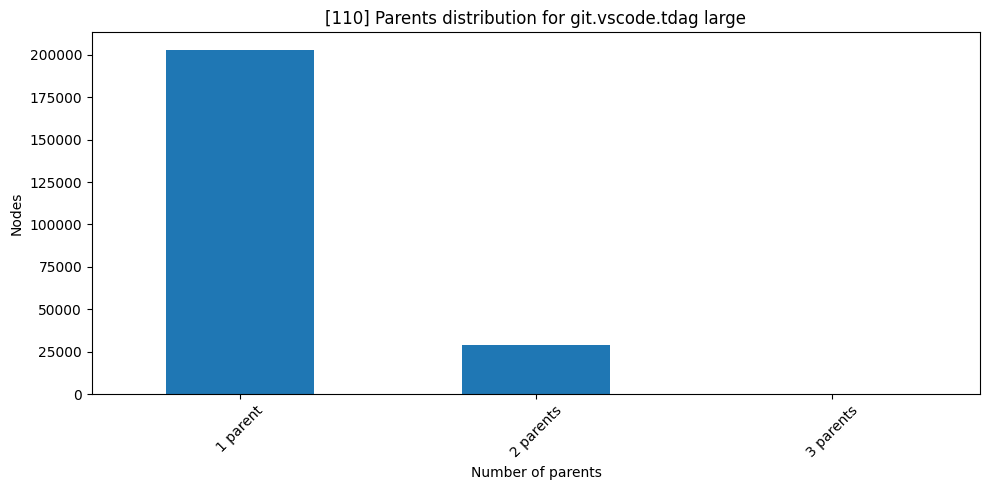

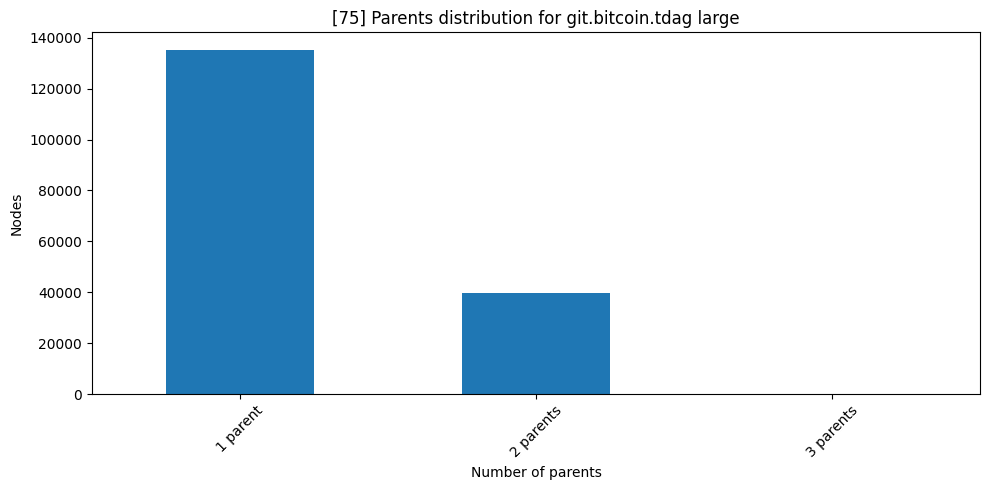

In [45]:
for type_g, graph_list in random_graphs(3, df_p).items():
    for name in graph_list:
        draw_histo_p(name, type_g, df_p, index[name])

On voit que la majorité des noeuds n'ont qu'un seul parent, puis environ 20% d'entre eux ont deux parents et très peu ont 3 parents. 

Cette observation semble coller au contexte de nos graphes. En effet, on a ici des graphes de projets git et dans le cas où un noeud a 2 parents, on a en fait un merge de deux branches. C'est donc cohérent de s'attendre à n'avoir que des mergres de deux branches au maximum et éventuellement trois rarement. De plus, comme les merges dans un projet restent peu commun, c'est logique d'avoir plus de noeuds à 1 parent.

Regardons plus précisément si on obersve ce comportement sur chaque graphes.

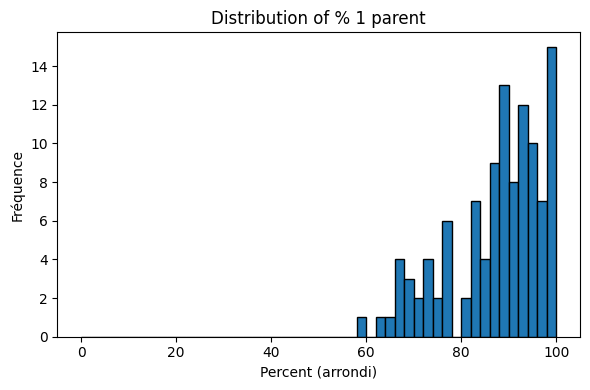

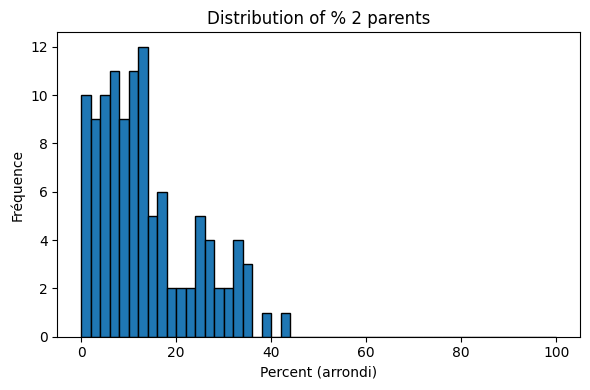

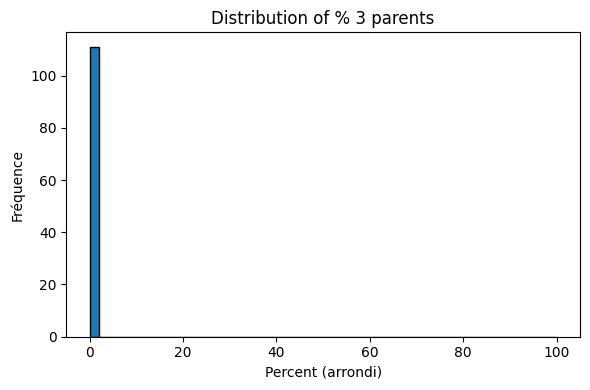

In [35]:
cols = ['% 1 parent', '% 2 parents', '% 3 parents']
for col in cols:
    val = df_p[col].round(0)  
    plt.figure(figsize=(6, 4))
    val.plot.hist(bins=range(0, 101, 2), edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Percent (arrondi)')
    plt.ylabel('Fréquence')
    plt.tight_layout()
    plt.show()

On a ici en abscisse, la propotion de $n$ parents et ordonnée, la fréquence de noeuds avec cette proportion. On compile tous les graphes.

On remarque alors, qu'entre 60 et 100% des noeuds des graphes ont 1 seul parent, en majorité on a entre 80 et 100% des noeuds. De même, entre 0 et 40% des noeuds des graphes ont 2 parents, la plupart du temps c'est entre 0 et 20% des noeuds. Enfin, moins de 2% des noeuds des graphes ont 3 parents.

Tout comme les enfants, nous allons faire la moyenne des proportions.

In [47]:
def generate_prop_p(df_p):
    cols_p = ["% 1 parent", "% 2 parents", "% 3 parents"] #, "% More than 3"]
    prob_p = [df_p[col].mean() for col in cols_p]
                 
    caract = [name.removeprefix("% ") for name in cols_p]
    probabilities = prob_p
    proportion = [p/100 for p in prob_p]

    df = pd.DataFrame({
        "Caract": caract,
        "Probability (%)": probabilities,
        "Proportion" : proportion
    })

    return df

generate_prop_p(df_p)

,Caract,Probability (%),Proportion
0,1 parent,86.924203,0.869242
1,2 parents,13.055760,0.130558
2,3 parents,0.001016,0.000010


Comme on l'avait observé, on retrouve la majorité du temps, des noeuds à 1 parent. Puis on a une petite proportion de merge à deux branches et enfin, très rarement, des merge à trois branches.

## 4. Proportion des noeuds du main

Pour finir, on va regarder la proportion de noeuds qui composent la branche main des graphes. Pour rappel, on a accès pour chaque graphe, à un fichier .main qui contient les identifiants des noeuds du main dans l'ordre topologique.

Comme d'habitude, on a les colonnes Type et File name avec en plus :
- Nodes count : le nombre de noeuds du graphe.
- Nodes in main : le nombre de noeuds dans la branche main.
- Prop : la proportion de noeuds du main par rapport au graphe complet.

In [50]:
df_main = pd.read_csv('CSV/GitDAG/stats_main_prop.csv')
df_main

,Type,File name,Nodes count,Nodes in main,Prop
0,small,git.incubator-wayang.tdag,3120,584,0.187179
1,small,git.answer.tdag,7241,811,0.112001
2,small,git.flink-cdc.tdag,6615,1340,0.202570
3,small,git.horaedb.tdag,6216,1010,0.162484
4,small,git.guacamole-server.tdag,4648,1320,0.283993
...,...,...,...,...,...
106,large,git.fdroiddata.tdag,121925,109326,0.896666
107,large,git.llvm-project.tdag,1145746,532312,0.464599
108,large,git.spark.tdag,332366,39474,0.118767
109,large,git.vscode.tdag,232068,63919,0.275432


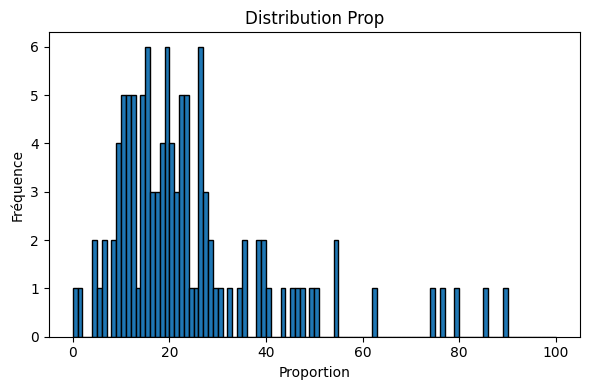

In [52]:
col = "Prop"
val = df_main[col]*100
bins = np.arange(0, 101, 1)

plt.figure(figsize=(6, 4))
val.plot.hist(bins=bins, edgecolor='black')

plt.title(f'Distribution {col}')
plt.xlabel('Proportion')
plt.ylabel('Fréquence')
plt.tight_layout()
plt.show()

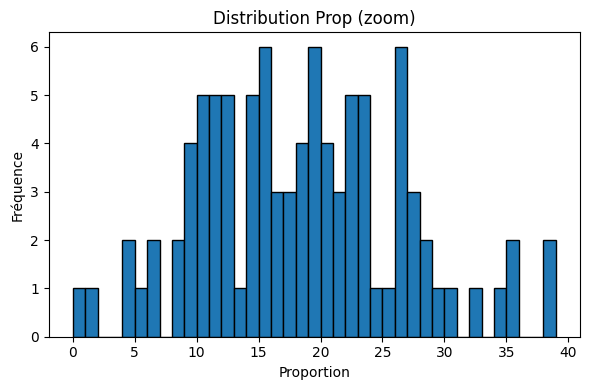

In [54]:
bins = np.arange(0, 40, 1)

plt.figure(figsize=(6, 4))
val.plot.hist(bins=bins, edgecolor='black')

plt.title(f'Distribution {col} (zoom)')
plt.xlabel('Proportion')
plt.ylabel('Fréquence')
plt.tight_layout()
plt.show()

On a donc en abscisse, la proportion des noeuds du main (de 0 à 100% du graphe) et ne ordonnée le nombre de graphe avec cette proportion.
Ainsi, on observe que les branches main contiennent en majorité entre 5 et 30% des noeuds du graphe.

## 5. Conclusion

Pour conclure, à l'aide des proportions moyennes calculées pour les enfants et parents, on peut construire un tableau qui récapitule les probabilités d'avoir $p$ parents et $e$ enfants (on coupe aux noeuds à 10 enfants car le reste est négligeable):

In [55]:
def generer_proba_dataframe(df_enf, df_p):
    cols_p = ["% 1 parent", "% 2 parents", "% 3 parents"] #, "% More than 3"]
    cols_c = ["% leaves", "% 1 child"]
    cols_c.extend([f"% {i} childrens" for i in range(2, 11)])
    #cols_c.append("% More than 30")

    prob_c = [df_enf[col].mean() for col in cols_c]
    prob_p = [df_p[col].mean() for col in cols_p]
                 
    caract = [name.removeprefix("% ") for name in cols_c] + [name.removeprefix("% ") for name in cols_p]
    caract[0] = "leaf"
    probabilities = prob_c + prob_p
    proportion = [p/100 for p in prob_c] + [p/100 for p in prob_p]

    df = pd.DataFrame({
        "Caract": caract,
        "Probability (%)": probabilities,
        "Proportion" : proportion
    })

    return df

In [56]:
generer_proba_dataframe(df_enf, df_p)

,Caract,Probability (%),Proportion
0,leaf,12.757305,0.127573
1,1 child,75.219585,0.752196
2,2 childrens,6.893395,0.068934
3,3 childrens,2.308890,0.023089
4,4 childrens,1.127482,0.011275
5,5 childrens,0.625511,0.006255
6,6 childrens,0.368789,0.003688
7,7 childrens,0.216154,0.002162
8,8 childrens,0.139359,0.001394
9,9 childrens,0.090524,0.000905


Ainsi, dans un graphe de projet git, on s'attend donc à avoir : 
- en majorité des noeuds à 1 enfant et 1 parent
- quelques noeuds à 2 et 3 enfants
- environ 12% de feuilles
- 13% de merge à deux branches avec très peu voir aucun merge à trois branches
- une branche main avec 8 à 30% des noeuds du graphe

Il faut tout de même nuancer sur les enfants. En effet comme nous avons des projets GitHub public à notre disposition. Les statistiques sur les enfants peuvent êtres faussées car en théorie n'importe qui pourrait créer une branche de n'importe quel noeuds (d'où le fait que certains noeuds ont beaucoup d'enfants). 

De plus, les nombre de feuille peut potentiellement varier si la branche est merge plus tard, ce qui entraîne une modification des proportions pour les enfants. Tout de même, les proportions pour les parents semblent plutôt solides et cohérents avec ce à quoi on pourrait s'attendre d'un graphe de git.